**ABSTRACT** :
 Acccording to the given project description evryday 5  mllion records are being stolen on a daily basis. Th given dataset gives the detailed description of the parameters that influences card fraudulent activites . We are requried to build a model that predicts fraudulent transcations and prevents it.



In [94]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn  as sns
from sklearn.model_selection import train_test_split

In [95]:
df=pd.read_csv('card_transdata.csv')

In [96]:
df

,distance_from_home,distance_from_last_transaction,ratio_to_median_purchase_price,repeat_retailer,used_chip,used_pin_number,online_order,fraud
0,57.877857,0.311140,1.945940,1.0,1.0,0.0,0.0,0.0
1,10.829943,0.175592,1.294219,1.0,0.0,0.0,0.0,0.0
2,5.091079,0.805153,0.427715,1.0,0.0,0.0,1.0,0.0
3,2.247564,5.600044,0.362663,1.0,1.0,0.0,1.0,0.0
4,44.190936,0.566486,2.222767,1.0,1.0,0.0,1.0,0.0
...,...,...,...,...,...,...,...,...
999995,2.207101,0.112651,1.626798,1.0,1.0,0.0,0.0,0.0
999996,19.872726,2.683904,2.778303,1.0,1.0,0.0,0.0,0.0
999997,2.914857,1.472687,0.218075,1.0,1.0,0.0,1.0,0.0
999998,4.258729,0.242023,0.475822,1.0,0.0,0.0,1.0,0.0


**Missing Data** : As the following command shows this particular dataset has no missing values.

In [97]:
df.isnull().any()

distance_from_home                False
distance_from_last_transaction    False
ratio_to_median_purchase_price    False
repeat_retailer                   False
used_chip                         False
used_pin_number                   False
online_order                      False
fraud                             False
dtype: bool

**Shape Of The Given Data**

In [98]:
df.shape

(1000000, 8)

**Data Types Of All Columns**

In [99]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000000 entries, 0 to 999999
Data columns (total 8 columns):
 #   Column                          Non-Null Count    Dtype  
---  ------                          --------------    -----  
 0   distance_from_home              1000000 non-null  float64
 1   distance_from_last_transaction  1000000 non-null  float64
 2   ratio_to_median_purchase_price  1000000 non-null  float64
 3   repeat_retailer                 1000000 non-null  float64
 4   used_chip                       1000000 non-null  float64
 5   used_pin_number                 1000000 non-null  float64
 6   online_order                    1000000 non-null  float64
 7   fraud                           1000000 non-null  float64
dtypes: float64(8)
memory usage: 61.0 MB


**Statistical Summary Of All The Features**

In [100]:
df.describe()

,distance_from_home,distance_from_last_transaction,ratio_to_median_purchase_price,repeat_retailer,used_chip,used_pin_number,online_order,fraud
count,1000000.000000,1000000.000000,1000000.000000,1000000.000000,1000000.000000,1000000.000000,1000000.000000,1000000.000000
mean,26.628792,5.036519,1.824182,0.881536,0.350399,0.100608,0.650552,0.087403
std,65.390784,25.843093,2.799589,0.323157,0.477095,0.300809,0.476796,0.282425
min,0.004874,0.000118,0.004399,0.000000,0.000000,0.000000,0.000000,0.000000
25%,3.878008,0.296671,0.475673,1.000000,0.000000,0.000000,0.000000,0.000000
50%,9.967760,0.998650,0.997717,1.000000,0.000000,0.000000,1.000000,0.000000
75%,25.743985,3.355748,2.096370,1.000000,1.000000,0.000000,1.000000,0.000000
max,10632.723672,11851.104565,267.802942,1.000000,1.000000,1.000000,1.000000,1.000000


In [101]:
df.columns

Index(['distance_from_home', 'distance_from_last_transaction',
       'ratio_to_median_purchase_price', 'repeat_retailer', 'used_chip',
       'used_pin_number', 'online_order', 'fraud'],
      dtype='object')

In [102]:
df.head(10)

,distance_from_home,distance_from_last_transaction,ratio_to_median_purchase_price,repeat_retailer,used_chip,used_pin_number,online_order,fraud
0,57.877857,0.311140,1.945940,1.0,1.0,0.0,0.0,0.0
1,10.829943,0.175592,1.294219,1.0,0.0,0.0,0.0,0.0
2,5.091079,0.805153,0.427715,1.0,0.0,0.0,1.0,0.0
3,2.247564,5.600044,0.362663,1.0,1.0,0.0,1.0,0.0
4,44.190936,0.566486,2.222767,1.0,1.0,0.0,1.0,0.0
5,5.586408,13.261073,0.064768,1.0,0.0,0.0,0.0,0.0
6,3.724019,0.956838,0.278465,1.0,0.0,0.0,1.0,0.0
7,4.848247,0.320735,1.273050,1.0,0.0,1.0,0.0,0.0
8,0.876632,2.503609,1.516999,0.0,0.0,0.0,0.0,0.0
9,8.839047,2.970512,2.361683,1.0,0.0,0.0,1.0,0.0


**Outliers:**Following boxplots shows there is not much of a outlier in the given dataset.

<AxesSubplot:xlabel='distance_from_home', ylabel='distance_from_last_transaction'>

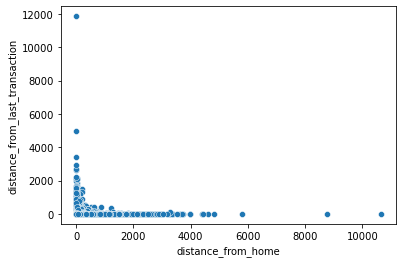

In [103]:
sns.scatterplot(x='distance_from_home',y='distance_from_last_transaction',data=df)


<AxesSubplot:xlabel='distance_from_home', ylabel='ratio_to_median_purchase_price'>

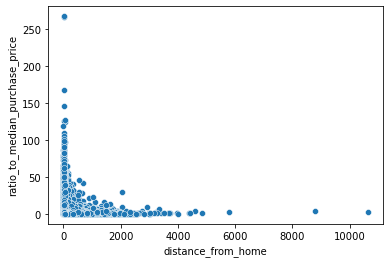

In [104]:
sns.scatterplot(x='distance_from_home',y='ratio_to_median_purchase_price',data=df)


<AxesSubplot:ylabel='distance_from_home'>

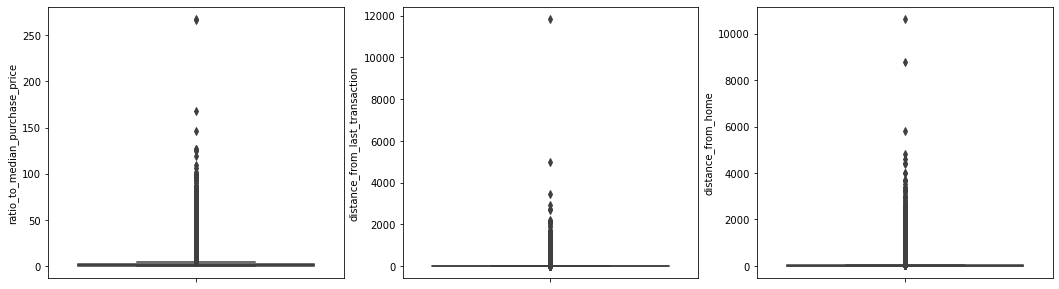

In [105]:
fig, ax =plt.subplots(1,3,sharex=True,figsize=(18,5))
sns.boxplot(y=df.ratio_to_median_purchase_price,ax=ax[0])
sns.boxplot(y=df.distance_from_last_transaction,ax=ax[1])
sns.boxplot(y=df.distance_from_home,ax=ax[2])




<AxesSubplot:ylabel='distance_from_home'>

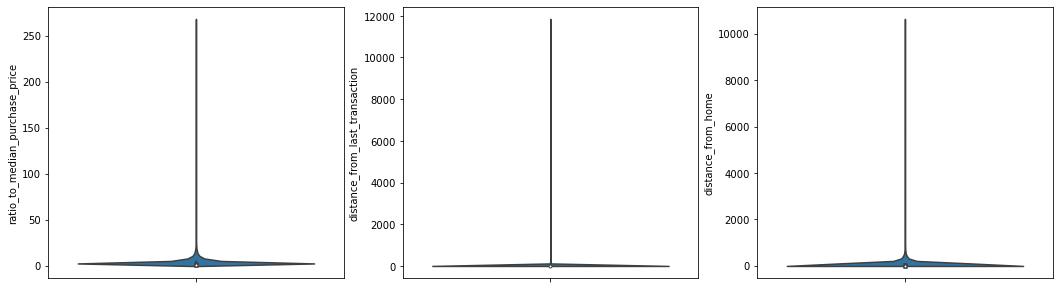

In [106]:
fig, ax =plt.subplots(1,3,sharex=True,figsize=(18,5))
sns.violinplot(y=df.ratio_to_median_purchase_price,ax=ax[0])
sns.violinplot(y=df.distance_from_last_transaction,ax=ax[1])
sns.violinplot(y=df.distance_from_home,ax=ax[2])



In [107]:
df.corr()

,distance_from_home,distance_from_last_transaction,ratio_to_median_purchase_price,repeat_retailer,used_chip,used_pin_number,online_order,fraud
distance_from_home,1.000000,0.000193,-0.001374,0.143124,-0.000697,-0.001622,-0.001301,0.187571
distance_from_last_transaction,0.000193,1.000000,0.001013,-0.000928,0.002055,-0.000899,0.000141,0.091917
ratio_to_median_purchase_price,-0.001374,0.001013,1.000000,0.001374,0.000587,0.000942,-0.000330,0.462305
repeat_retailer,0.143124,-0.000928,0.001374,1.000000,-0.001345,-0.000417,-0.000532,-0.001357
used_chip,-0.000697,0.002055,0.000587,-0.001345,1.000000,-0.001393,-0.000219,-0.060975
used_pin_number,-0.001622,-0.000899,0.000942,-0.000417,-0.001393,1.000000,-0.000291,-0.100293
online_order,-0.001301,0.000141,-0.000330,-0.000532,-0.000219,-0.000291,1.000000,0.191973
fraud,0.187571,0.091917,0.462305,-0.001357,-0.060975,-0.100293,0.191973,1.000000


<AxesSubplot:>

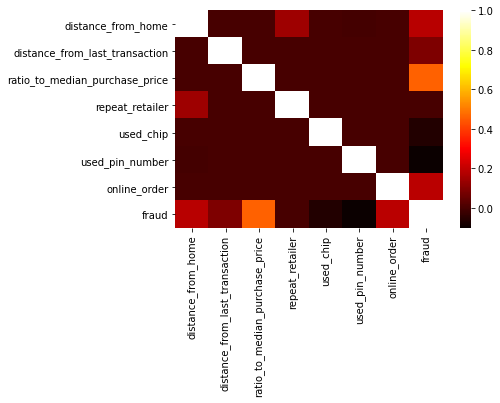

In [108]:
corr=df.corr()
sns.heatmap(corr,cmap="hot")

**Plots after Outliers are handled**

-1.9553720889586974 4.527415677411437


<AxesSubplot:ylabel='ratio_to_median_purchase_price'>

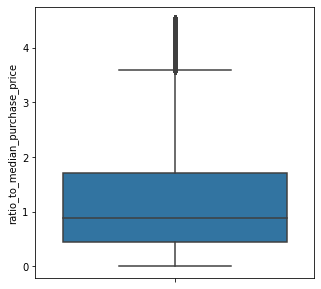

In [109]:
Q1 = df.ratio_to_median_purchase_price.quantile(0.25)
Q3 = df.ratio_to_median_purchase_price.quantile(0.75)
IQR = Q3 - Q1
lower_limit = Q1 - 1.5*IQR
upper_limit = Q3 + 1.5*IQR
print(lower_limit,upper_limit)
df=df[(df.ratio_to_median_purchase_price>lower_limit)&(df.ratio_to_median_purchase_price<upper_limit)]
plt.figure(figsize = (5, 5))

sns.boxplot(y = df.ratio_to_median_purchase_price)



<AxesSubplot:title={'center':'ratio_to_median_purchase_price'}, ylabel='ratio_to_median_purchase_price'>

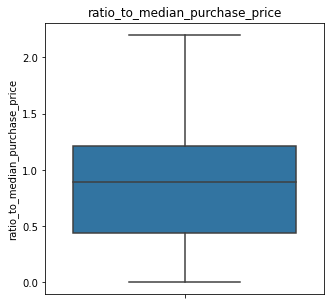

In [131]:
mean_values=df['ratio_to_median_purchase_price'].mean()
df.loc[df.ratio_to_median_purchase_price> 2.2, 'ratio_to_median_purchase_price'] = np.nan
df['ratio_to_median_purchase_price']=df['ratio_to_median_purchase_price'].fillna(mean_values)
plt.figure(figsize = (5, 5))
plt.title('ratio_to_median_purchase_price')
sns.boxplot(y = df.ratio_to_median_purchase_price)

<AxesSubplot:ylabel='ratio_to_median_purchase_price'>

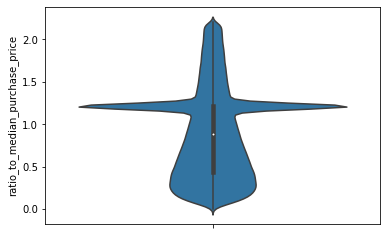

In [111]:
sns.violinplot(y=df.ratio_to_median_purchase_price)


-4.295797914235591 7.950495657051105


<AxesSubplot:ylabel='distance_from_last_transaction'>

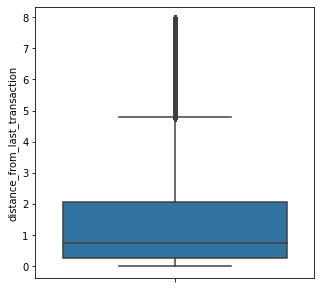

In [112]:
Q1 = df.distance_from_last_transaction.quantile(0.25)
Q3 = df.distance_from_last_transaction.quantile(0.75)
IQR = Q3 - Q1
lower_limit = Q1 - 1.5*IQR
upper_limit = Q3 + 1.5*IQR
print(lower_limit,upper_limit)
df=df[(df.distance_from_last_transaction>lower_limit)&(df.distance_from_last_transaction<upper_limit)]
plt.figure(figsize = (5, 5))

sns.boxplot(y = df.distance_from_last_transaction)


<AxesSubplot:title={'center':'distance_from_last_transaction'}, ylabel='distance_from_last_transaction'>

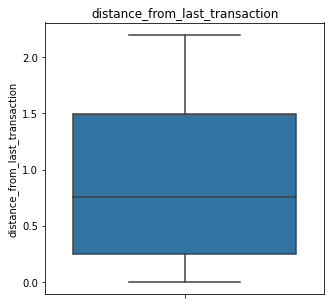

In [113]:
mean_values=df['distance_from_last_transaction'].mean()
df.loc[df.distance_from_last_transaction> 2.2, 'distance_from_last_transaction'] = np.nan
df['distance_from_last_transaction']=df['distance_from_last_transaction'].fillna(mean_values)
plt.figure(figsize = (5, 5))
plt.title('distance_from_last_transaction')
sns.boxplot(y = df.distance_from_last_transaction)

<AxesSubplot:ylabel='distance_from_last_transaction'>

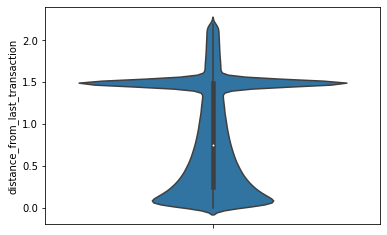

In [114]:
sns.violinplot(y=df.distance_from_last_transaction)

-28.912943699009254 58.52454704697623


<AxesSubplot:ylabel='distance_from_home'>

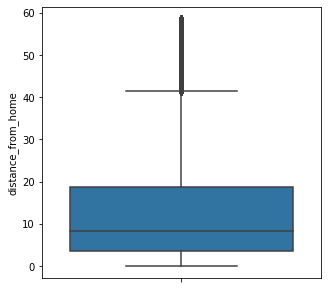

In [115]:
Q1 = df.distance_from_home.quantile(0.25)
Q3 = df.distance_from_home.quantile(0.75)
IQR = Q3 - Q1
lower_limit = Q1 - 1.5*IQR
upper_limit = Q3 + 1.5*IQR
print(lower_limit,upper_limit)
df=df[(df.distance_from_home>lower_limit)&(df.distance_from_home<upper_limit)]
plt.figure(figsize = (5, 5))

sns.boxplot(y = df.distance_from_home)


<AxesSubplot:title={'center':'distance_from_home'}, ylabel='distance_from_home'>

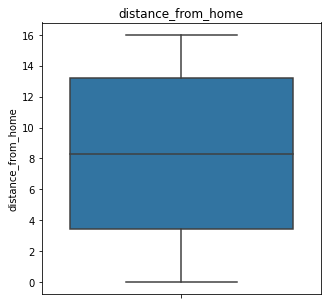

In [116]:
mean_values=df['distance_from_home'].mean()
df.loc[df.distance_from_home > 16, 'distance_from_home'] = np.nan
df['distance_from_home']=df['distance_from_home'].fillna(mean_values)
plt.figure(figsize = (5, 5))
plt.title('distance_from_home')
sns.boxplot(y = df.distance_from_home)

<AxesSubplot:ylabel='distance_from_home'>

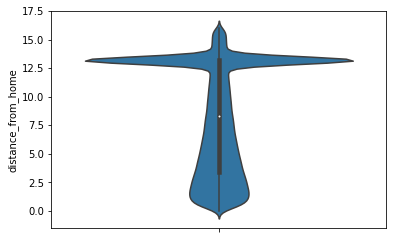

In [117]:
sns.violinplot(y=df.distance_from_home)


In [118]:
df.isnull().any()

distance_from_home                False
distance_from_last_transaction    False
ratio_to_median_purchase_price    False
repeat_retailer                   False
used_chip                         False
used_pin_number                   False
online_order                      False
fraud                             False
dtype: bool

<AxesSubplot:xlabel='distance_from_home', ylabel='distance_from_last_transaction'>

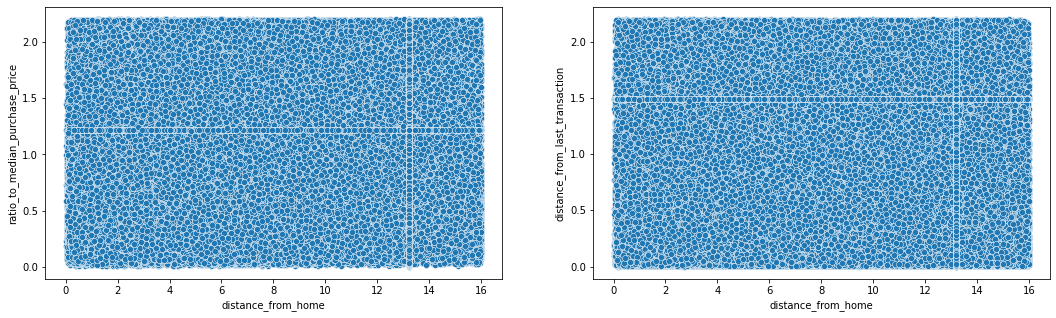

In [119]:
fig,ax=plt.subplots(1,2,figsize=(18,5))
sns.scatterplot(x='distance_from_home',y='ratio_to_median_purchase_price',data=df,ax=ax[0])
sns.scatterplot(x='distance_from_home',y='distance_from_last_transaction',data=df,ax=ax[1])

**Correlation :** Values after outliers removed.

In [120]:
df.corr()


,distance_from_home,distance_from_last_transaction,ratio_to_median_purchase_price,repeat_retailer,used_chip,used_pin_number,online_order,fraud
distance_from_home,1.000000,-0.003112,0.000431,0.569666,0.001140,-0.000199,-0.001058,-0.008325
distance_from_last_transaction,-0.003112,1.000000,0.000447,-0.002801,-0.000436,0.000562,-0.001931,0.001349
ratio_to_median_purchase_price,0.000431,0.000447,1.000000,0.001072,0.000436,-0.001389,-0.000188,0.066937
repeat_retailer,0.569666,-0.002801,0.001072,1.000000,-0.001746,0.000029,0.000021,-0.010759
used_chip,0.001140,-0.000436,0.000436,-0.001746,1.000000,-0.002242,-0.000464,-0.004337
used_pin_number,-0.000199,0.000562,-0.001389,0.000029,-0.002242,1.000000,-0.000076,-0.037737
online_order,-0.001058,-0.001931,-0.000188,0.000021,-0.000464,-0.000076,1.000000,0.072614
fraud,-0.008325,0.001349,0.066937,-0.010759,-0.004337,-0.037737,0.072614,1.000000


<AxesSubplot:>

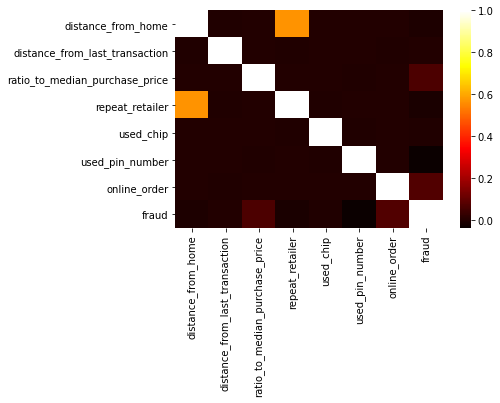

In [121]:
corr=df.corr()
sns.heatmap(corr,cmap="hot")

In [122]:
x=df.drop('fraud',axis=1)
y=df['fraud']

In [123]:

x_train,x_test,y_train,y_test=train_test_split(x,y,train_size=2/3,random_state=0)


In [124]:
x_train.isnull().any()

distance_from_home                False
distance_from_last_transaction    False
ratio_to_median_purchase_price    False
repeat_retailer                   False
used_chip                         False
used_pin_number                   False
online_order                      False
dtype: bool

In [125]:
from sklearn.preprocessing import StandardScaler
sc=StandardScaler()
x_train=sc.fit_transform(x_train)
x_test=sc.fit_transform(x_test)

In [126]:
x_train

array([[ 0.86910654,  1.03681108,  1.51518136, ..., -0.7342888 ,
        -0.33419985, -1.36553488],
       [ 0.24265766, -1.36052391,  0.59332613, ...,  1.36186198,
        -0.33419985,  0.73231377],
       [-1.30629101, -1.12312705,  0.63812334, ..., -0.7342888 ,
         2.99222155,  0.73231377],
       ...,
       [ 0.66388585,  1.03681108, -0.70089686, ..., -0.7342888 ,
        -0.33419985,  0.73231377],
       [ 1.04407323,  1.03681108, -0.34960836, ...,  1.36186198,
        -0.33419985, -1.36553488],
       [-1.45581414, -0.82527755,  0.33179602, ..., -0.7342888 ,
        -0.33419985, -1.36553488]])

In [127]:
x_test

array([[ 1.04508897,  2.10064872, -1.32690405, ..., -0.7353529 ,
        -0.33457014,  0.73320513],
       [ 0.75231207,  1.03376806,  0.59238889, ..., -0.7353529 ,
         2.98890985, -1.3638748 ],
       [ 1.04508897,  1.03376806, -1.0332413 , ..., -0.7353529 ,
        -0.33457014, -1.3638748 ],
       ...,
       [-0.3975479 , -1.07651415, -0.13914602, ..., -0.7353529 ,
        -0.33457014,  0.73320513],
       [-0.12058621,  1.16439692, -1.13818829, ..., -0.7353529 ,
        -0.33457014,  0.73320513],
       [ 1.30940095,  0.19673854, -0.06644375, ..., -0.7353529 ,
        -0.33457014, -1.3638748 ]])

In [128]:
y_train

972658    0.0
250382    0.0
800126    0.0
89458     0.0
241412    0.0
         ... 
500476    0.0
211474    0.0
163832    0.0
606435    0.0
424950    0.0
Name: fraud, Length: 479196, dtype: float64

In [129]:
y_test

48981     0.0
986894    0.0
78196     0.0
925735    0.0
250626    0.0
         ... 
59000     0.0
433674    0.0
75998     0.0
560783    0.0
484674    0.0
Name: fraud, Length: 239598, dtype: float64

**Conclusion :** In Conclusion , as the heat map shows there is not much of a correlation between the columns and also frauds are keep happening in different ways it is difficult to train machine on existing data. Out of **1000000** only **87403** i.e. 8.74% of fraud is happenenig,which shows rare occurence fauds which makes it difficult to predict it accurately.So these models must be trained frequently inorder to predict different types of frauds in near future.